<a href="https://colab.research.google.com/github/PaulMRivera/Computational_physics/blob/master/Activity_7/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

**Ejercicio 1.**
Defina las siguientes matrices.

In [ ]:
A = np.array([[1, 3],[-1, 7]])
B = np.array([[5, 2],[1, 2]])
I = np.eye(2, dtype=int)
print(f"A={A}")
print()
print(f"B={B}")
print()
print(f"I={I}")

A=[[ 1  3]
 [-1  7]]

B=[[5 2]
 [1 2]]

I=[[1 0]
 [0 1]]


In [ ]:
M = (2*I)+(3*A)+(A@B)
print(f"M={M}")

M=[[13 17]
 [-1 35]]


**Ejercicio 2.**
Los polinomios característicos y el Teorema de Cayley-Hamilton.

In [ ]:
M = np.array([[1, 3],[-1, 7]])
I = np.eye(2, dtype=int)

#CALCULANDO EL DETERMINANTE DE LA MATRIZ M
det = la.det(M)

#CALCULANDO LA TRAZA DE M
tr = np.trace(M)

#TEROMA DE CAYLEY-HAMILTON
P2 = (det*I) - (tr*M) + (mpow(M,2))

print("Determinante : ",det)
print()
print("Traza: ", tr)
print()
print("Matriz Caracteristica: ")
print()
print( P2 )

Determinante :  10.0

Traza:  8

Matriz Caracteristica: 

[[0. 0.]
 [0. 0.]]


**Ejercicio 3:**
Resuelva el sistema de ecuaciones.

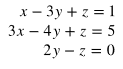


Utilizando el Método de Eliminación Gaussiana y la función scipy.linalg.solve()

In [ ]:
#DEFINICION DE FUNCIONES PARA LA RESOLUCION GAUSSIANA
#DEFINIMOS 3 FUNCIONES

#INTERCAMBIO DE POSICION DE RENGLONES
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# MULTIPLICAR UN RENGLON POR UNA CONSTANTE NO NULA
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

#SUMAR UN MULTIPLO DE UN RENGLO A OTRO RENGLON
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [ ]:
M = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
#CONVIRTIENDO EL SISTEMA DE ECUACIONES A UNA MATRIZ 3X3
print(M)
print()
print('det(M) = ', la.det(M))

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]

det(M) =  -1.0000000000000004


In [ ]:
# MATRIZ AUMENTADA: UNIMOS LA MATRIZ M CON LA MATRIZ IDENTIDAD
A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
A1 = scale_row(A,1/3,1)
# R2*1/3 -----> R2
A2 = add_row(A1,-1,1,0)
# R2+(-R1) ---> R2
print(A2)

[[ 1.         -3.          1.          1.          0.          0.        ]
 [ 0.          1.66666667 -0.66666667 -1.          0.33333333  0.        ]
 [ 0.          2.         -1.          0.          0.          1.        ]]


In [ ]:
A3 = scale_row(A2,1/2,2)
# R3*(1/2) -----> R3
A4= add_row(A3,(-3/5.),2,1)
# R3-R2*(-3/5) ----->R3
print(A4)

[[ 1.         -3.          1.          1.          0.          0.        ]
 [ 0.          1.66666667 -0.66666667 -1.          0.33333333  0.        ]
 [ 0.          0.         -0.1         0.6        -0.2         0.5       ]]


In [ ]:
A5 = add_row(A4,10.0,0,2)
#R1+10*R3--------> R1
A6 = add_row(A5,(-20/3),1,2)
#R2+(-20/3*R3) --------> R2
A7 = add_row(A6,9/5,0,1)
#R1+(9/3*R2)---------> R1
print(A7)

[[ 1.00000000e+00  2.07241631e-16 -1.24344979e-16 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.66666667e+00 -1.92438658e-16 -5.00000000e+00
   1.66666667e+00 -3.33333333e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e-01  6.00000000e-01
  -2.00000000e-01  5.00000000e-01]]


In [ ]:
A8 = scale_row(A7,3/5,1)
A9 = scale_row(A8,-10,2)
print(A9)

[[ 1.00000000e+00  2.07241631e-16 -1.24344979e-16 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.15463195e-16 -3.00000000e+00
   1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -6.00000000e+00
   2.00000000e+00 -5.00000000e+00]]


In [ ]:
# HEMOS OBTENIDO LA INVERSA
M_inv = A9[:,3:]
print(M_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [ ]:
# El producto de M_inv @ M = I 
result = M_inv @ M
print(result)

[[ 1.00000000e+00 -8.88178420e-16  4.44089210e-16]
 [-3.33066907e-16  1.00000000e+00  0.00000000e+00]
 [-6.66133815e-16  0.00000000e+00  1.00000000e+00]]


In [ ]:
# Checamos la inversa de M con la función 'la.inv(M)'
la.inv(M)

array([[-2.,  1., -1.],
       [-3.,  1., -2.],
       [-6.,  2., -5.]])

In [ ]:
# definimos b. Recordemos que tenemos que usar la función .reshape()
b = np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
# La solución es:
x = M_inv @ b

print(x)

[[3.]
 [2.]
 [4.]]


In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol = la.solve(M, b)
print(x_sol)

[[3.]
 [2.]
 [4.]]




**Ejercicio 4:**

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)
$$\begin{equation*} B_1 = \begin{bmatrix} 2 &  0 &  0 \\ 0 &  3 &  4 \\ 0 &  4 &  9 \\ \end{bmatrix} \end{equation*}$$$$\begin{equation*} B_2 = \begin{bmatrix} 0 &  1 &  0 \\ 0 &  0 &  1 \\ 1 &  0 &  0 \\ \end{bmatrix} \end{equation*}$$$$\begin{equation*} B_3 = \begin{bmatrix} 2 &  0 &  0 &  0\\ 1 &  2 &  0 &  0 \\ 0 &  1 &  3 &  0 \\ 0 &  0 &  1 &  3 \\ \end{bmatrix} \end{equation*}$$

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.


In [ ]:
B1 =np.array([[2,0,0],
              [0,3,4],
              [0,4,9]])
#SE DEFINE LA MATRIZ B1

print("Matriz B1")
print(B1)

eigvalsB1, eigvecsB1 = la.eig(B1)
#SE SACAN LOS VALORES DE EIGENVECTORES Y EIGENVALORES

print()
print('Eigenvalores:', eigvalsB1)
print()

v1 = eigvecsB1[:,0]
v2 = eigvecsB1[:,1]
v3 = eigvecsB1[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B1
[[2 0 0]
 [0 3 4]
 [0 4 9]]

Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]

v1= [0.         0.4472136  0.89442719]
v2= [ 0.          0.89442719 -0.4472136 ]
v3= [1. 0. 0.]


In [ ]:
B2 =np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])
#SE DEFINE LA MATRIZ B2

print("Matriz B2")
print(B2)

eigvalsB2, eigvecsB2 = la.eig(B2)
#SE SACAN LOS VALORES DE EIGENVECTORES Y EIGENVALORES

print()
print('Eigenvalores:', eigvalsB2)
print()

v1 = eigvecsB2[:,0]
v2 = eigvecsB2[:,1]
v3 = eigvecsB2[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B2
[[0 1 0]
 [0 0 1]
 [1 0 0]]

Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]

v1= [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
v2= [ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j]
v3= [-0.57735027+0.j -0.57735027+0.j -0.57735027+0.j]


In [ ]:
B3 =np.array([[2,0,0,0],
              [1,2,0,0],
              [0,1,3,0],
              [0,0,1,3]])
#SE DEFINE LA MATRIZ B3

print("Matriz B2")
print(B3)

eigvalsB3, eigvecsB3 = la.eig(B3)
#SE SACAN LOS VALORES DE EIGENVECTORES Y EIGENVALORES

print()
print('Eigenvalores:', eigvalsB3)
print()

v1 = eigvecsB3[:,0]
v2 = eigvecsB3[:,1]
v3 = eigvecsB3[:,2]
v4 = eigvecsB3[:,3]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)
print('v4=',v4)

Matriz B2
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]

Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]

v1= [0. 0. 0. 1.]
v2= [ 0.00000000e+00  0.00000000e+00  6.66133815e-16 -1.00000000e+00]
v3= [ 0.          0.57735027 -0.57735027  0.57735027]
v4= [ 2.56395025e-16 -5.77350269e-01  5.77350269e-01 -5.77350269e-01]


Ejercicio 5. Se tienen los siguientes 8 puntos:
$$\begin{eqnarray*} (x&,&y) \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space (1) \\ (0.0 &,& 0.0), \space \space \space \space \space \space \space \space \space \space (2)\\ (0.5 &,& 0.47942), \space \space (3)\\ (1.0 &,& 0.84147), \space \space (4)\\ (1.5 &,& 0.99749), \space \space (5)\\ (2.0 &,& 0.90930), \space \space (6)\\ (2.5 &,& 0.59847), \space \space (7)\\ (3.0 &,& 0.14112), \space \space (8)\\ (3.5 &,& -0.35078) \space (9)\\ \end{eqnarray*}$$

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

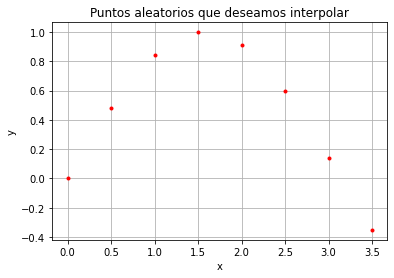

In [ ]:
N = np.array([[0.0, 0.0], 
               [0.5, 0.47942], 
               [1.0 , 0.84147],
               [1.5 , 0.99749],
               [2.0 , 0.90930],
               [2.5 , 0.59847],
               [3.0 , 0.14112],
               [3.5 ,-0.35078]])
#ARRAY, ARREGLO DE PUNTOS ( X, Y)

i = 0 #COLUMNA QUE QUEREMOS OBTENER 1
j = 1 #cOLUMNA QUE QUEREMOS OBTENER 2
x = [fila[i] for fila in N]
y = [fila[j] for fila in N]
x = np.array(x)
y= np.array(y)

plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntos aleatorios que deseamos interpolar')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# La biblioteca Numpy tambien tiene una función para crear la matriz de Vandermonde
X = np.vander(x,increasing=True)
# Sólo imprimimos los primeros 5 renglones y columnas.
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [ ]:
# USAMOS LA FUNCION DE  scipy.linalg.solve(), PARA ENCONTRAR LOS 8 COEFICIENTES
# DE LA ECUACION LINEAL Xa=y
a = la.solve(X,y)
print(a)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


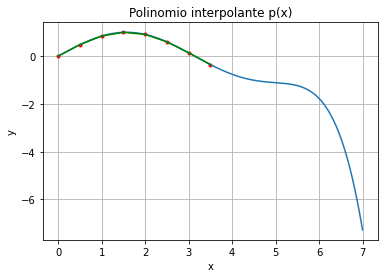

In [ ]:
# Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en rojo ('r.')
xs = np.linspace(0,8-1,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys);
plt.plot(x,np.sin(x),"g")
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ejercicio 6. Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.